In [1]:
!pip install psycopg2-binary
!pip install pandas
!pip install seaborn
!pip install matplotlib

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------------------------- ------------ 0.8/1.2 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 1.8 MB/s eta 0:00:00


In [45]:
import psycopg2 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="postgresql",
    host="localhost",
    port="5432"
)

In [47]:
cur = conn.cursor()

cur.execute("""
    CREATE TABLE IF NOT EXISTS studentet (
        id SERIAL PRIMARY KEY,
        emri VARCHAR(100),
        mbiemri VARCHAR(100),
        mosha INT
    )
""")

conn.commit()
cur.close()


In [48]:
cur = conn.cursor()

cur.execute("""
    INSERT INTO studentet (emri, mbiemri, mosha)
    VALUES 
        ('Ardit', 'Hoxha', 21),
        ('Erisa', 'Basha', 22),
        ('Ilir', 'Krasniqi', 20)
""")

conn.commit()
cur.close()



In [49]:
query = "SELECT * FROM studentet;"
df = pd.read_sql_query(query, conn)

C:\Users\INTEL12\AppData\Local\Temp\ipykernel_2636\1997565845.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [50]:
conn.close()

print(df.head())

   id   emri   mbiemri  mosha
0   1  Ardit     Hoxha     21
1   2  Erisa     Basha     22
2   3   Ilir  Krasniqi     20
3   4  Ardit     Hoxha     21
4   5  Erisa     Basha     22


In [51]:
filtered_df = df[df['mosha'] > 20]
grouped_df = df.groupby('mbiemri')['mosha'].mean().reset_index()
count_df = df.groupby('emri').size().reset_index(name='nr_studentesh')

In [52]:
df2 = pd.DataFrame({
    'mosha': [20, 22],
    'pershkrim': ['Studentë Bachelor', 'Studentë Master']
})

merged_df = pd.merge(grouped_df, df2, on='mosha', how='left')
print(merged_df)

    mbiemri  mosha          pershkrim
0     Basha   22.0    Studentë Master
1     Hoxha   21.0                NaN
2  Krasniqi   20.0  Studentë Bachelor


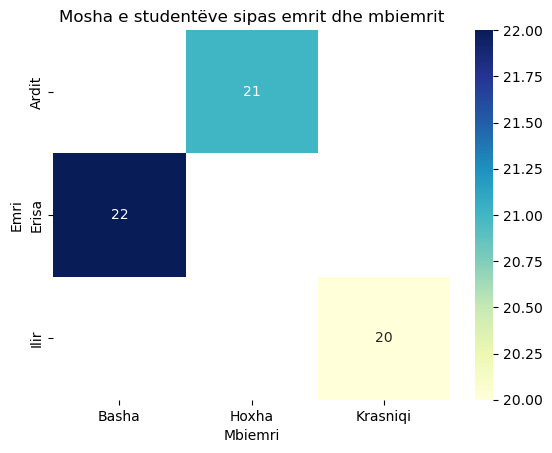

In [53]:
pivot_df = df.pivot_table(index='emri', columns='mbiemri', values='mosha', aggfunc='mean')

sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mosha e studentëve sipas emrit dhe mbiemrit')
plt.ylabel('Emri')
plt.xlabel('Mbiemri')
plt.show()

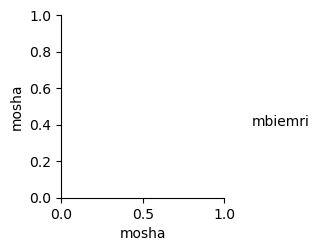

In [56]:
sns.pairplot(df[['mosha', 'emri', 'mbiemri']], hue='emri')
plt.show()